In [1]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/dataset'


Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


test_datagen = ImageDataGenerator(rescale=1./255)


train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1013 images belonging to 4 classes.
Found 251 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output sesuai jumlah kategori
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.9594 - loss: 0.1065 - val_accuracy: 0.9482 - val_loss: 0.3123
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.9697 - loss: 0.1057 - val_accuracy: 0.9283 - val_loss: 0.1858
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.9580 - loss: 0.1055 - val_accuracy: 0.9402 - val_loss: 0.2690
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.9754 - loss: 0.0717 - val_accuracy: 0.9522 - val_loss: 0.2705
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9774 - loss: 0.0784 - val_accuracy: 0.9044 - val_loss: 0.2523
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9700 - loss: 0.0795 - val_accuracy: 0.9442 - val_loss: 0.2369
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.9727 - loss: 0.0742 - val_accuracy: 0.9243 - val_loss: 0.2470
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.9714 - loss: 0.0620 - val_accuracy: 0.9522 - v

In [29]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9624 - loss: 0.1623
Test Accuracy: 95.25%


13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step


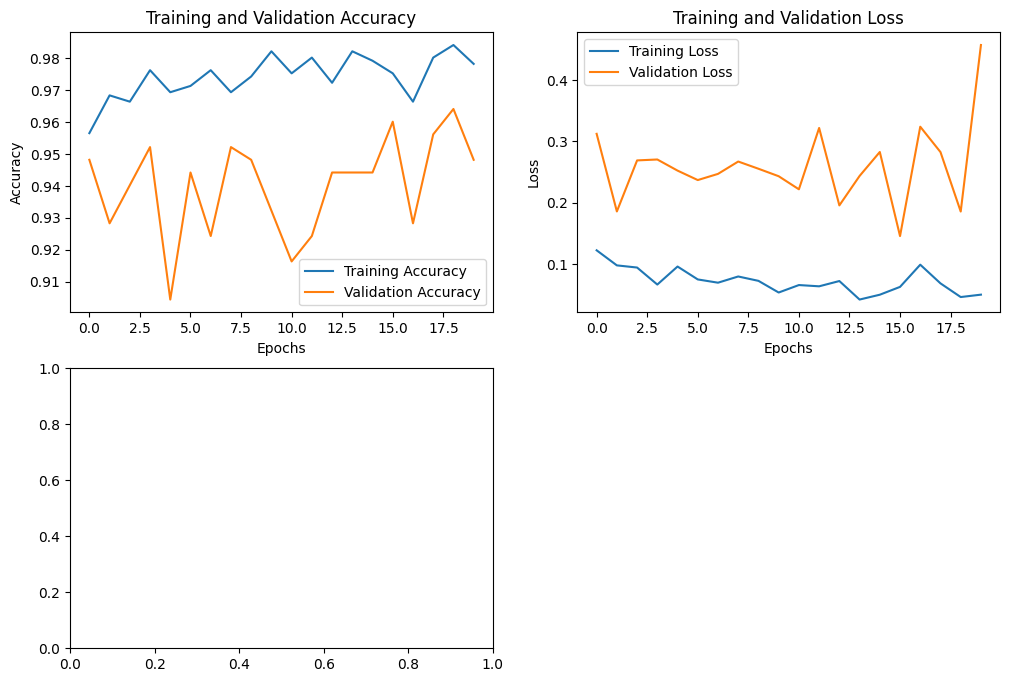

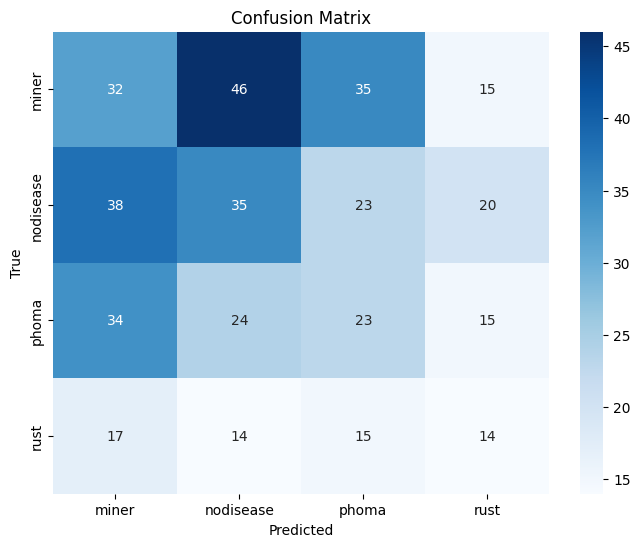

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Plotting Training Accuracy and Loss
plt.figure(figsize=(12, 8))

# Subplot untuk Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot untuk Loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Confusion Matrix
def plot_confusion_matrix(model, test_generator, class_names):
    """
    Fungsi untuk menampilkan confusion matrix dari model.
    """
    # Prediksi pada data uji
    y_true = test_generator.classes
    y_pred = model.predict(test_generator, verbose=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plotting Confusion Matrix
    plt.subplot(2, 2, 3)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Menampilkan confusion matrix
plot_confusion_matrix(model, test_generator, list(test_generator.class_indices.keys()))

plt.tight_layout()
plt.show()


In [31]:
model.save('coffee_leaf_disease_model.h5')


In [32]:

loaded_model = tf.keras.models.load_model('coffee_leaf_disease_model.h5')


test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Accuracy (Loaded Model): {test_accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9532 - loss: 0.2271
Test Accuracy (Loaded Model): 95.25%


In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path, model, class_names):
    """
    Fungsi untuk memprediksi gambar tunggal menggunakan model CNN.

    Args:
        img_path (str): Path ke gambar.
        model (tf.keras.Model): Model yang telah dilatih.
        class_names (list): Daftar nama kelas.

    Returns:
        None: Menampilkan gambar dan hasil prediksi.
    """

    img = image.load_img(img_path, target_size=(224, 224))


    plt.imshow(img)
    plt.axis('off')
    plt.show()


    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = predictions[0][predicted_class] * 100


    print(f"Prediksi: {class_names[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")


In [34]:
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)


Class Names: ['miner', 'nodisease', 'phoma', 'rust']


Saving 1658.jpg to 1658.jpg

Memprediksi gambar: 1658.jpg


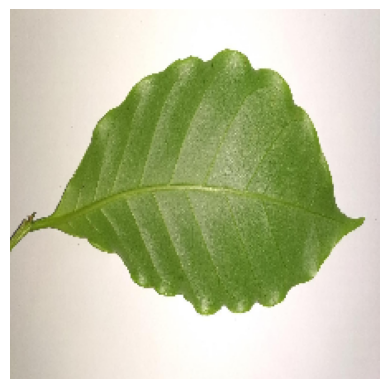

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediksi: nodisease
Confidence: 98.88%


In [38]:
from google.colab import files

uploaded = files.upload()

for file_name in uploaded.keys():
    print(f"\nMemprediksi gambar: {file_name}")
    predict_image(file_name, model, class_names)


In [39]:
import tensorflow as tf


model = tf.keras.models.load_model('coffee_leaf_disease_model.h5')


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('coffee_leaf_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TensorFlow Lite!")


Saved artifact at '/tmp/tmpjqm8is68'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134946167244576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167249504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167343232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167346752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167355552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167356256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167354672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946131728288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167103104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946131840336: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil di

In [40]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_optimized = converter.convert()


with open('coffee_leaf_disease_model_optimized.tflite', 'wb') as f:
    f.write(tflite_model_optimized)

print("Model dengan optimisasi berhasil dibuat!")


Saved artifact at '/tmp/tmparawfc9n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134946167244576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167249504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167343232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167346752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167355552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167356256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167354672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946131728288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946167103104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134946131840336: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model dengan opti